In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("/Users/unun/Desktop/Sony Project/UK revenue 2015-2020.csv")

In [181]:
df.dropna(inplace=True)
df

,2015,2016,2017,2018,2019,2020
Company,,,,,,
Sony,166115000,1.393360e+08,1.519540e+08,1.654590e+08,1.728560e+08,1.812900e+08
Universal,220790000,2.389880e+08,2.421020e+08,2.683550e+08,2.800070e+08,3.015910e+08
Warner,131221000,1.409600e+08,1.773580e+08,1.973730e+08,1.760680e+08,1.350170e+08
Kobalt,31573000,3.339500e+07,4.589400e+07,5.258700e+07,6.543700e+07,7.524700e+07
Kobalt Publishing,19418000,2.282640e+08,2.604570e+08,3.167990e+08,4.052900e+08,4.361100e+07
AWAL,2942800,1.914300e+07,3.964000e+07,5.919400e+07,1.115030e+08,1.494620e+08
NB Rights,1797000,2.000000e+06,6.715000e+06,8.331000e+06,6.217000e+06,7.495000e+06
AMRA,967000,2.164800e+07,3.459000e+07,4.482900e+07,6.560000e+07,7.829400e+07
BMG Rights Management,17414000,3.350100e+07,6.955900e+07,8.742800e+07,6.626700e+07,4.653800e+07


In [4]:
df.rename(columns={ df.columns[0]: "Companies" }, inplace = True)

In [5]:
df['Company'] = ['Sony', 'Universal', 'Warner', 'Kobalt', 'Kobalt Publishing', 'AWAL', 'NB Rights', 'AMRA', 'BMG Rights Management', 
'Beggars UK', 'Beggars Sales', 'Beggars Mg', 'Total Industry']

In [6]:
df.set_index('Company', inplace=True)

In [7]:
df.drop('Companies', axis=1, inplace=True)

In [ ]:
#adjust dtypes

In [11]:
df.shape

(13, 6)

In [12]:
df.dtypes

2015    int64
2016    int64
2017    int64
2018    int64
2019    int64
2020    int64
dtype: object

In [9]:
df['2015'] = df['2015'].str.replace(',','')
df['2016'] = df['2016'].str.replace(',','')
df['2017'] = df['2017'].str.replace(',','')
df['2018'] = df['2018'].str.replace(',','')
df['2019'] = df['2019'].str.replace(',','')
df['2020'] = df['2020'].str.replace(',','')

In [10]:
df['2015'] = pd.to_numeric(df['2015'])
df['2016'] = pd.to_numeric(df['2016'])
df['2017'] = pd.to_numeric(df['2017'])
df['2018'] = pd.to_numeric(df['2018'])
df['2019'] = pd.to_numeric(df['2019'])
df['2020'] = pd.to_numeric(df['2020'])

In [ ]:
#combine Kobalt as one and add in data for Beggars, Domino, and Ninja Tune

In [13]:
df.loc['Industry Total'] = {'2015':990000000, '2016':759000000, '2017':839500000, '2018':997000000, '2019':1077000000, '2020':1118000000}

In [15]:
df.loc['Domino'] = {'2015':3094670, '2016':3306390, '2017':2999670, '2018':6301950, '2019':4028000, '2020':4221000}
df.loc['Ninja Tune'] = {'2015':0, '2016':0, '2017':2546200, '2018':3140160, '2019':4015130, '2020':4358400}

In [23]:
df.loc['Other Firms'] = {'2015':0, '2016':190880225, '2017':207145461, '2018':293894940, '2019':364698093, '2020':406089863}

In [ ]:
#HHI Calculation

In [24]:
((df['2020'][0])+(df['2020'][3])+(df['2020'][2])+(df['2020'][1])+(df['2020'][9])+(df['2020'][-3])+(df['2020'][-2]))

711910137

In [25]:
(df.loc['Industry Total'][-1]) - ((df['2020'][0])+(df['2020'][3])+(df['2020'][2])+(df['2020'][1])+(df['2020'][9])+(df['2020'][-3])+(df['2020'][-2]))

406089863

In [26]:
(df.loc['Industry Total'][-2]) - ((df['2019'][0])+(df['2019'][3])+(df['2019'][2])+(df['2019'][1])+(df['2019'][9])+(df['2019'][-3])+(df['2019'][-2]))

364698093

In [27]:
(df.loc['Industry Total'][-3]) - ((df['2018'][0])+(df['2018'][3])+(df['2018'][2])+(df['2018'][1])+(df['2018'][9])+(df['2018'][-3])+(df['2018'][-2]))

293894940

In [28]:
(df.loc['Industry Total'][-4]) - ((df['2017'][0])+(df['2017'][3])+(df['2017'][2])+(df['2017'][1])+(df['2017'][9])+(df['2017'][-3])+(df['2017'][-2]))

207145461

In [29]:
(df.loc['Industry Total'][-5]) - ((df['2016'][0])+(df['2016'][3])+(df['2016'][2])+(df['2016'][1])+(df['2016'][9])+(df['2016'][-3])+(df['2016'][-2]))

190880225

In [ ]:
#Calculate HHI includes
#Revenue for each companies.  
#Number of firms: 7 firms (Sony, Kobalt (add all4 subsidiaries), Warner, UMG, Beggars, Domino, Ninja) 
#Number of years: 5 years (2015-2020)

In [ ]:
#before merger

In [31]:
Sony_msb = (((df['2020'][0])/(df.loc['Industry Total'][-1])*100)**2)
Kobalt_msb = (((df['2020'][3])/(df.loc['Industry Total'][-1])*100)**2)
Warner_msb = (((df['2020'][2])/(df.loc['Industry Total'][-1])*100)**2)
universal_msb = (((df['2020'][1])/(df.loc['Industry Total'][-1])*100)**2)
Beggars_msb = (((df['2020'][9])/(df.loc['Industry Total'][-1])*100)**2)
Domino_msb = (((df['2020'][-3])/(df.loc['Industry Total'][-1])*100)**2)
Ninja_msb = (((df['2020'][-2])/(df.loc['Industry Total'][-1])*100)**2)
Other_msb = (((df['2020'][-1])/(df.loc['Industry Total'][-1])*100)**2)

print(f"Sony_msb = {Sony_msb} \nKobalt_msb = {Kobalt_msb} \nWarner_msb = {Warner_msb} \nuniversal_msb = {universal_msb} \nBeggars_msb = {Beggars_msb} \nDomino_msb = {Domino_msb} \nNinja_msb = {Ninja_msb} \nOther_msb = {Other_msb}")

Sony_msb = 262.9444998255894 
Kobalt_msb = 45.299642290251256 
Warner_msb = 145.84558972385526 
universal_msb = 727.7012944867046 
Beggars_msb = 0.830044372563204 
Domino_msb = 0.142543394638394 
Ninja_msb = 0.15197444452622721 
Other_msb = 1319.3520312543703


In [32]:
HHI_2020 = Sony_msb + Kobalt_msb + Warner_msb + universal_msb + Beggars_msb + Domino_msb + Ninja_msb + Other_msb
print(f"HHI 2020 = {HHI_2020}")

HHI 2020 = 2502.2676197924984


In [33]:
Sony_msb1 = (((df['2019'][0])/(df.loc['Industry Total'][-2])*100)**2)
Kobalt_msb1 = (((df['2019'][3])/(df.loc['Industry Total'][-2])*100)**2)
Warner_msb1 = (((df['2019'][2])/(df.loc['Industry Total'][-2])*100)**2)
universal_msb1 = (((df['2019'][1])/(df.loc['Industry Total'][-2])*100)**2)
Beggars_msb1 = (((df['2019'][9])/(df.loc['Industry Total'][-2])*100)**2)
Domino_msb1 = (((df['2019'][-3])/(df.loc['Industry Total'][-2])*100)**2)
Ninja_msb1 = (((df['2019'][-2])/(df.loc['Industry Total'][-2])*100)**2)
Other_msb1 = (((df['2019'][-1])/(df.loc['Industry Total'][-2])*100)**2)

print(f"Sony_msb = {Sony_msb1} \nKobalt_msb = {Kobalt_msb1} \nWarner_msb = {Warner_msb1} \nuniversal_msb = {universal_msb1} \nBeggars_msb = {Beggars_msb1} \nDomino_msb = {Domino_msb1} \nNinja_msb = {Ninja_msb1} \nOther_msb = {Other_msb1}")

Sony_msb = 257.59504880040066 
Kobalt_msb = 36.916060974421704 
Warner_msb = 267.2572254336256 
universal_msb = 675.9372345117675 
Beggars_msb = 0.8433918771211771 
Domino_msb = 0.1398773890470882 
Ninja_msb = 0.13898496301842617 
Other_msb = 1146.6624167327195


In [34]:
HHI_2019 = Sony_msb1 + Kobalt_msb1 + Warner_msb1 + universal_msb1 + Beggars_msb1 + Domino_msb1 + Ninja_msb1 + Other_msb1
print(f"HHI 2019 = {HHI_2019}")

HHI 2019 = 2385.4902406821216


In [35]:
Sony_msb2 = (((df['2018'][0])/(df.loc['Industry Total'][-3])*100)**2)
Kobalt_msb2 = (((df['2018'][3])/(df.loc['Industry Total'][-3])*100)**2)
Warner_msb2 = (((df['2018'][2])/(df.loc['Industry Total'][-3])*100)**2)
universal_msb2 = (((df['2018'][1])/(df.loc['Industry Total'][-3])*100)**2)
Beggars_msb2 = (((df['2018'][9])/(df.loc['Industry Total'][-3])*100)**2)
Domino_msb2 = (((df['2018'][-3])/(df.loc['Industry Total'][-3])*100)**2)
Ninja_msb2 = (((df['2018'][-2])/(df.loc['Industry Total'][-3])*100)**2)
Other_msb2 = (((df['2018'][-1])/(df.loc['Industry Total'][-3])*100)**2)

print(f"Sony_msb = {Sony_msb2} \nKobalt_msb = {Kobalt_msb2} \nWarner_msb = {Warner_msb2} \nuniversal_msb = {universal_msb2} \nBeggars_msb = {Beggars_msb2} \nDomino_msb = {Domino_msb2} \nNinja_msb = {Ninja_msb2} \nOther_msb = {Other_msb2}")

Sony_msb = 275.4168290327351 
Kobalt_msb = 27.820598897997908 
Warner_msb = 391.90893773597617 
universal_msb = 724.4844465693972 
Beggars_msb = 0.983807310622942 
Domino_msb = 0.39953937844124143 
Ninja_msb = 0.09920035759837183 
Other_msb = 868.9482264004008


In [36]:
HHI_2018 = Sony_msb2 + Kobalt_msb2 + Warner_msb2 + universal_msb2 + Beggars_msb2 + Domino_msb2 + Ninja_msb2 + Other_msb2
print(f"HHI 2018 = {HHI_2018}")

HHI 2018 = 2290.06158568317


In [37]:
Sony_msb3 = (((df['2017'][0])/(df.loc['Industry Total'][-4])*100)**2)
Kobalt_msb3 = (((df['2017'][3])/(df.loc['Industry Total'][-4])*100)**2)
Warner_msb3 = (((df['2017'][2])/(df.loc['Industry Total'][-4])*100)**2)
universal_msb3 = (((df['2017'][1])/(df.loc['Industry Total'][-4])*100)**2)
Beggars_msb3 = (((df['2017'][9])/(df.loc['Industry Total'][-4])*100)**2)
Domino_msb3 = (((df['2017'][-3])/(df.loc['Industry Total'][-4])*100)**2)
Ninja_msb3 = (((df['2017'][-2])/(df.loc['Industry Total'][-4])*100)**2)
Other_msb3 = (((df['2017'][-1])/(df.loc['Industry Total'][-4])*100)**2)

print(f"Sony_msb = {Sony_msb3} \nKobalt_msb = {Kobalt_msb3} \nWarner_msb = {Warner_msb3} \nuniversal_msb = {universal_msb3} \nBeggars_msb = {Beggars_msb3} \nDomino_msb = {Domino_msb3} \nNinja_msb = {Ninja_msb3} \nOther_msb = {Other_msb3}")

Sony_msb = 327.6294046947171 
Kobalt_msb = 29.886180953026223 
Warner_msb = 446.33419895631187 
universal_msb = 831.6782679499871 
Beggars_msb = 1.2807576966430927 
Domino_msb = 0.1276749094305475 
Ninja_msb = 0.09199063709963778 
Other_msb = 608.8487824462647


In [38]:
HHI_2017 = Sony_msb3 + Kobalt_msb3 + Warner_msb3 + universal_msb3 + Beggars_msb3 + Domino_msb3 + Ninja_msb3 + Other_msb3
print(f"HHI 2017 = {HHI_2017}")

HHI 2017 = 2245.8772582434804


In [39]:
Sony_msb4 = (((df['2016'][0])/(df.loc['Industry Total'][-5])*100)**2)
Kobalt_msb4 = (((df['2016'][3])/(df.loc['Industry Total'][-5])*100)**2)
Warner_msb4 = (((df['2016'][2])/(df.loc['Industry Total'][-5])*100)**2)
universal_msb4 = (((df['2016'][1])/(df.loc['Industry Total'][-5])*100)**2)
Beggars_msb4 = (((df['2016'][9])/(df.loc['Industry Total'][-5])*100)**2)
Domino_msb4 = (((df['2016'][-3])/(df.loc['Industry Total'][-5])*100)**2)
Ninja_msb4 = (((df['2016'][-2])/(df.loc['Industry Total'][-5])*100)**2)
Other_msb4 = (((df['2016'][-1])/(df.loc['Industry Total'][-5])*100)**2)

print(f"Sony_msb = {Sony_msb4} \nKobalt_msb = {Kobalt_msb4} \nWarner_msb = {Warner_msb4} \nuniversal_msb = {universal_msb4} \nBeggars_msb = {Beggars_msb4} \nDomino_msb = {Domino_msb4} \nNinja_msb = {Ninja_msb4} \nOther_msb = {Other_msb4}")

Sony_msb = 337.01026237629776 
Kobalt_msb = 19.35884059706881 
Warner_msb = 344.91194120271285 
universal_msb = 991.4450249878055 
Beggars_msb = 2.5559478498375228 
Domino_msb = 0.18976871016575794 
Ninja_msb = 0.0 
Other_msb = 632.467661597078


In [40]:
HHI_2016 = Sony_msb4 + Kobalt_msb4 + Warner_msb4 + universal_msb4 + Beggars_msb4 + Domino_msb4 + Ninja_msb4 + Other_msb4
print(f"HHI 2016 = {HHI_2016}")

HHI 2016 = 2327.939447320966


In [208]:
HHI_index = {'Year': ['2016', '2017', '2018', '2019', '2020']}
HHI_df = pd.DataFrame(HHI_index)

In [209]:
HHI_df['Value'] = [HHI_2016, HHI_2017, HHI_2018, HHI_2019, HHI_2020]

In [210]:
HHI_df.set_index('Year', inplace=True)

In [211]:
HHI_df

,Value
Year,
2016,2327.939447
2017,2245.877258
2018,2290.061586
2019,2385.490241
2020,2502.267620


In [224]:
ms_value = {'Year': ['2016', '2017', '2018', '2019', '2020'], 'Sony': [np.sqrt(Sony_msb4), np.sqrt(Sony_msb3), np.sqrt(Sony_msb2), np.sqrt(Sony_msb1), np.sqrt(Sony_msb)], 'Warner': [np.sqrt(Warner_msb4), np.sqrt(Warner_msb3), np.sqrt(Warner_msb2), np.sqrt(Warner_msb1), np.sqrt(Warner_msb)], 'Universal': [np.sqrt(universal_msb4), np.sqrt(universal_msb3), np.sqrt(universal_msb2), np.sqrt(universal_msb1), np.sqrt(universal_msb)], 'Beggars': [np.sqrt(Beggars_msb4), np.sqrt(Beggars_msb3), np.sqrt(Beggars_msb2), np.sqrt(Beggars_msb1), np.sqrt(Beggars_msb)],'Other': [np.sqrt(Other_msb4), np.sqrt(Other_msb3), np.sqrt(Other_msb2), np.sqrt(Other_msb1), np.sqrt(Other_msb)]}

In [225]:
ms_df = pd.DataFrame(ms_value)

In [226]:
ms_df

,Year,Sony,Warner,Universal,Beggars,Other
0,2016,18.357839,18.571805,31.487220,1.598733,25.148910
1,2017,18.100536,21.126623,28.838833,1.131706,24.674861
2,2018,16.595687,19.796690,26.916249,0.991871,29.477928
3,2019,16.049768,16.348004,25.998793,0.918364,33.862404
4,2020,16.215564,12.076655,26.975939,0.911068,36.322886


In [180]:
df.loc['Sony MS'] = {'2015': 0, '2016':np.sqrt(Sony_msb4), '2017':np.sqrt(Sony_msb3), '2018':np.sqrt(Sony_msb2), '2019':np.sqrt(Sony_msb1), '2020':np.sqrt(Sony_msb)}

In [ ]:
#post merger

In [ ]:
#plot

Text(0.5, 1.0, 'Sony Market Share')

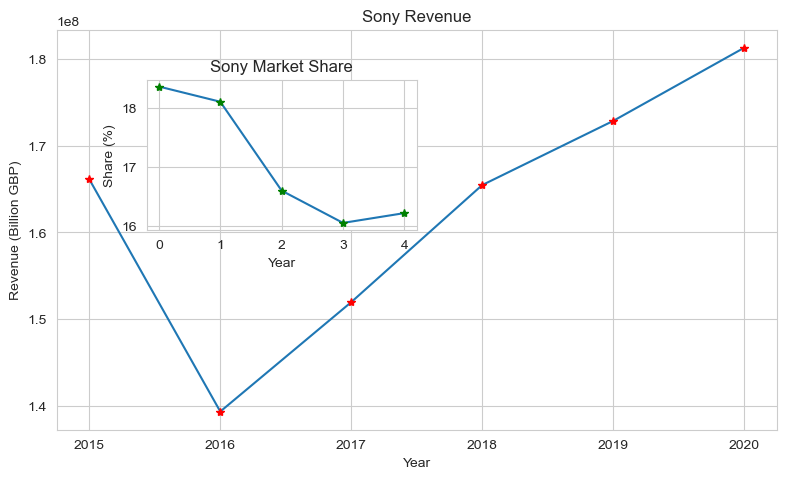

In [164]:
#Comparing Annual Revenue and Market Share of Sony from year 2016-2020

x1 = df.loc['Sony']
x2 = ms_df['Sony']

fig = plt.figure(figsize=(9,5), dpi=100)
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
plt.xlabel('Year')
plt.ylabel('Revenue (Billion GBP)')

axes2 = fig.add_axes([0.2,0.5,0.3,0.3])
plt.xlabel('Year')
plt.ylabel('Share (%)')

axes1.plot(x1, marker='*', markerfacecolor='red', markeredgecolor='red')
axes2.plot(x2, marker='*', markerfacecolor='green', markeredgecolor='green')

axes1.set_title('Sony Revenue')
axes2.set_title('Sony Market Share')

Text(0.5, 1.0, 'Industry Total')

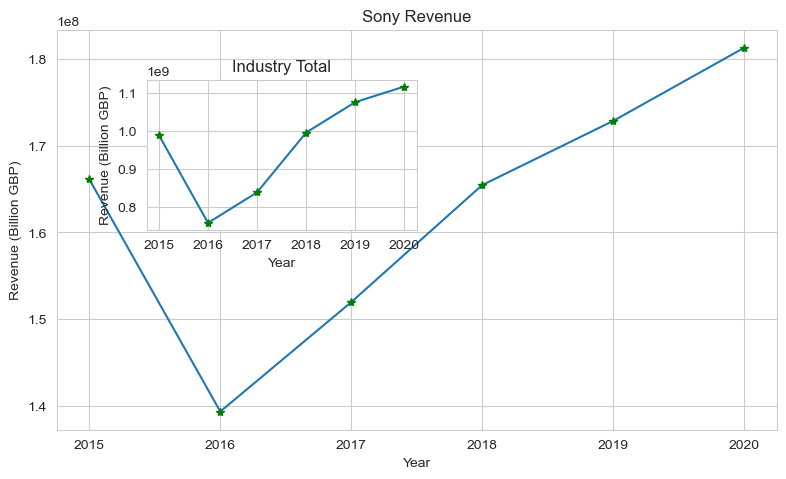

In [134]:
#Comparing Annual Revenue of Sony and Recorded Music Industry Total Revenue from year 2016-2020

x1 = df.loc['Sony']
x2 = df.loc['Industry Total']

fig = plt.figure(figsize=(9,5), dpi=100)
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
plt.xlabel('Year')
plt.ylabel('Revenue (Billion GBP)')

axes2 = fig.add_axes([0.2,0.5,0.3,0.3])
plt.xlabel('Year')
plt.ylabel('Revenue (Billion GBP)')

axes1.plot(x1, marker='*', markerfacecolor='green', markeredgecolor='green')
axes2.plot(x2, marker='*', markerfacecolor='green', markeredgecolor='green')

axes1.set_title('Sony Revenue')
axes2.set_title('Industry Total')

Text(0.5, 1.0, 'Beggars')

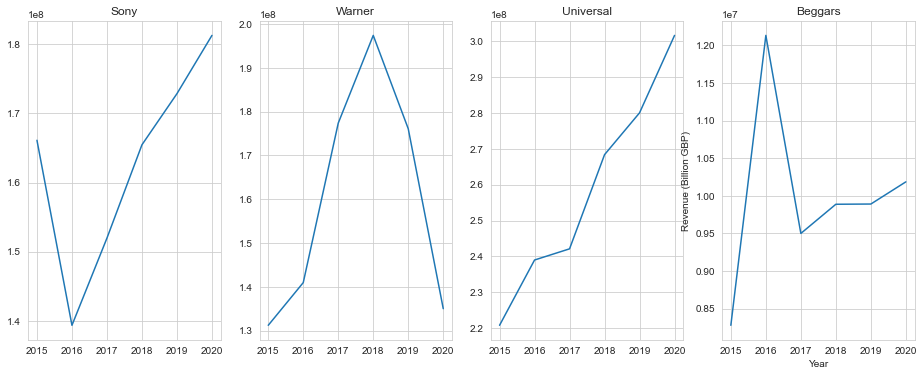

In [171]:
#Comparing Annual Revenue (billion GBP) of Big 4 from year 2016-2020

fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(13,5))
plt.tight_layout()

plt.xlabel('Year')
plt.ylabel('Revenue (Billion GBP)')

axes[0].plot(df.loc['Sony'])
axes[0].set_title('Sony')

axes[1].plot(df.loc['Warner'])
axes[1].set_title('Warner')

axes[2].plot(df.loc['Universal'])
axes[2].set_title('Universal')

axes[3].plot(df.loc['Beggars'])
axes[3].set_title('Beggars')

Text(659.704347826087, 0.5, 'Share (%)')

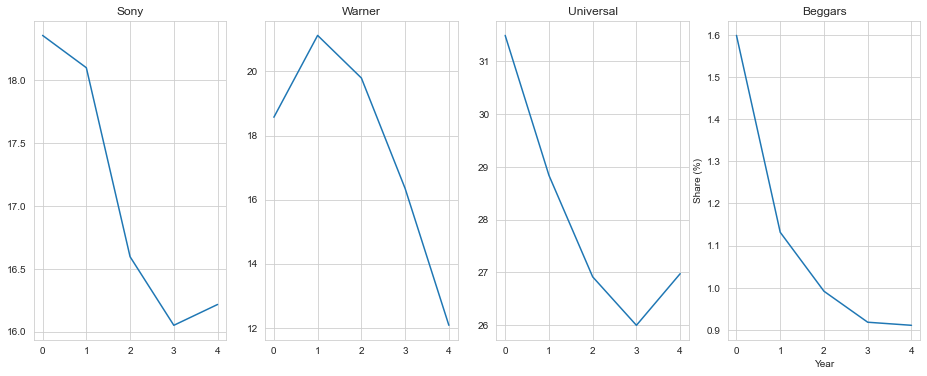

In [170]:
#Comparing Market Share of Big 4 from year 2016-2020
fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(13,5))
plt.tight_layout()

axes[0].plot(ms_df['Sony'])
axes[0].set_title('Sony')

axes[1].plot(ms_df['Warner'])
axes[1].set_title('Warner')

axes[2].plot(ms_df['Universal'])
axes[2].set_title('Universal')

axes[3].plot(ms_df['Beggars'])
axes[3].set_title('Beggars')

plt.xlabel('Year')
plt.ylabel('Share (%)')


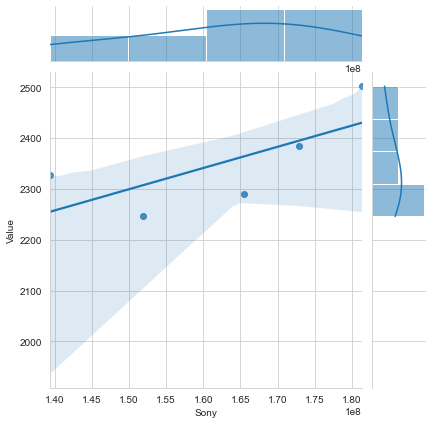

In [212]:
sns.jointplot(x=df.loc['Sony'], y=HHI_df['Value'], kind='reg')
#there are positive relationship between Sony's increase in revenue(indicating that its growing) and HHI value
#This means, if Sony grows even larger after the merger HHI is expected to increase even more

<AxesSubplot:xlabel='Year'>

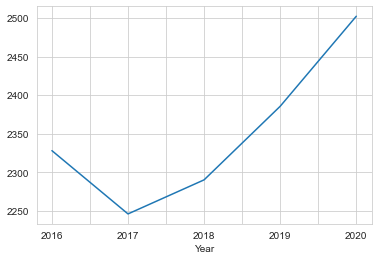

In [215]:
HHI_df['Value'].plot()

<AxesSubplot:>

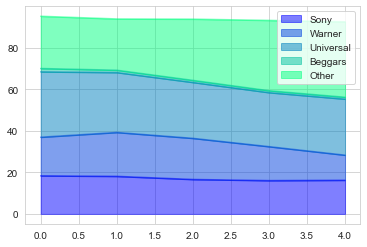

In [227]:
ms_df.plot.area(alpha=0.5, cmap='winter')
#you can see that the 3 firms covers more than half of the whole market

In [ ]:
#CR4 Calculation
#Revenue for each companies.
#Number of firms: 4 firms (those that have >5% marketshare) 
#Pre (Sony, Warner, UMG, Beggars) 
#Post (Sony(Plus AWAL and KNR), Warner, UMG, Beggars) 
#Number of years: 5 years (2015-2020) 

In [ ]:
#pre merger

In [45]:
CR4_20 = (((df['2020'][0])+(df['2020'][1])+(df['2020'][2])+(df['2020'][9]))/(df.loc['Industry Total'][-1]))*100
CR4_20

56.179225134168156

In [46]:
CR4_19 = (((df['2019'][0])+(df['2019'][1])+(df['2019'][2])+(df['2019'][9]))/(df.loc['Industry Total'][-2]))*100
CR4_19

59.31492822655524

In [47]:
CR4_18 = (((df['2018'][0])+(df['2018'][1])+(df['2018'][2])+(df['2018'][9]))/(df.loc['Industry Total'][-3]))*100
CR4_18

64.3004964894684

In [48]:
CR4_17 = (((df['2017'][0])+(df['2017'][1])+(df['2017'][2])+(df['2017'][9]))/(df.loc['Industry Total'][-4]))*100
CR4_17

69.19769731983322

In [49]:
CR4_16 = (((df['2016'][0])+(df['2016'][1])+(df['2016'][2])+(df['2016'][9]))/(df.loc['Industry Total'][-5]))*100
CR4_16

70.01559749670619

In [50]:
CR4_index = {'Year': ['2020', '2019', '2018', '2017', '2016'], 'Pre Value': [CR4_20, CR4_19, CR4_18, CR4_17, CR4_16], 'Post Value': [0,0,0,0,0]}
CR4_df = pd.DataFrame(CR4_index)
CR4_df.set_index('Year', inplace=True)

In [51]:
CR4_df

,Pre Value,Post Value
Year,,
2020,56.179225,0
2019,59.314928,0
2018,64.300496,0
2017,69.197697,0
2016,70.015597,0
